In [13]:
!pip install prophet
!pip install yfinance
key = input("Press a key: ")
import prophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on colab


Press a key:  y


In [45]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf  
import pandas as pd

df = pd.read_csv('dataset_social_technical_1d_v3.csv')
df.head()

,date,close,volume,SMA_15,SMA_ratio,SMA15_Volume,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
0,2018-01-02,64.400002,219072.0,64.573334,0.994017,348265.266667,0.555061,43.370749,1.145254,49.278354,0.817626,0.108905,0.031072,0.52645,0.840097,0.150846,0.009058
1,2018-01-03,66.199997,256706.0,64.484667,0.993662,329124.000000,0.611814,49.213487,1.075724,42.185655,1.001608,0.167948,2.763115,0.20095,0.505398,0.476686,0.017916
2,2018-01-04,66.680000,306794.0,64.465334,0.990829,310316.666667,0.691514,94.326116,1.055682,48.481671,1.291496,-0.179607,0.331028,-0.61240,0.824533,0.169098,0.006369
3,2018-01-05,67.379997,176037.0,64.615334,0.989152,300906.333333,0.811558,81.718468,0.969574,64.115417,1.050823,-0.474865,0.747608,0.22870,0.666439,0.313903,0.019658
4,2018-01-08,68.120003,271314.0,64.908667,0.987054,281487.000000,0.872077,94.515485,0.931893,80.470877,0.936350,-0.773145,1.671646,0.49390,0.043767,0.919694,0.036539


In [16]:
# Plot the close price of the Stock prices
fig = px.line(x = df['close'].index, 
              y = df['close'])
fig.show()



In [17]:
from prophet import Prophet

model = Prophet()
p_df = pd.DataFrame({ "ds": df.index, "y": df["close"]}).reset_index(drop=True)



In [18]:

p_df['ds'] = df['date']
p_df.head()

,ds,y
0,2018-01-02,64.400002
1,2018-01-03,66.199997
2,2018-01-04,66.680000
3,2018-01-05,67.379997
4,2018-01-08,68.120003


In [19]:
model = Prophet()
model.fit(p_df)


16:10:17 - cmdstanpy - INFO - Chain [1] start processing
16:10:18 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1276,2022-11-13
1277,2022-11-14
1278,2022-11-15
1279,2022-11-16


In [21]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1276,2022-11-13,35.321783,23.184572,35.723154,32.208910,38.554286,-5.887074,-5.887074,-5.887074,1.103200,1.103200,1.103200,-6.990273,-6.990273,-6.990273,0.0,0.0,0.0,29.434710
1277,2022-11-14,35.283423,21.224951,33.445287,32.132943,38.558294,-7.621768,-7.621768,-7.621768,-0.484015,-0.484015,-0.484015,-7.137753,-7.137753,-7.137753,0.0,0.0,0.0,27.661655
1278,2022-11-15,35.245064,21.023646,34.138162,32.040242,38.562301,-7.666364,-7.666364,-7.666364,-0.397935,-0.397935,-0.397935,-7.268429,-7.268429,-7.268429,0.0,0.0,0.0,27.578700
1279,2022-11-16,35.206704,21.391002,33.416041,31.961945,38.563480,-7.872248,-7.872248,-7.872248,-0.491294,-0.491294,-0.491294,-7.380954,-7.380954,-7.380954,0.0,0.0,0.0,27.334456
1280,2022-11-17,35.168344,20.775294,33.360624,31.883648,38.590757,-7.969293,-7.969293,-7.969293,-0.495035,-0.495035,-0.495035,-7.474258,-7.474258,-7.474258,0.0,0.0,0.0,27.199051


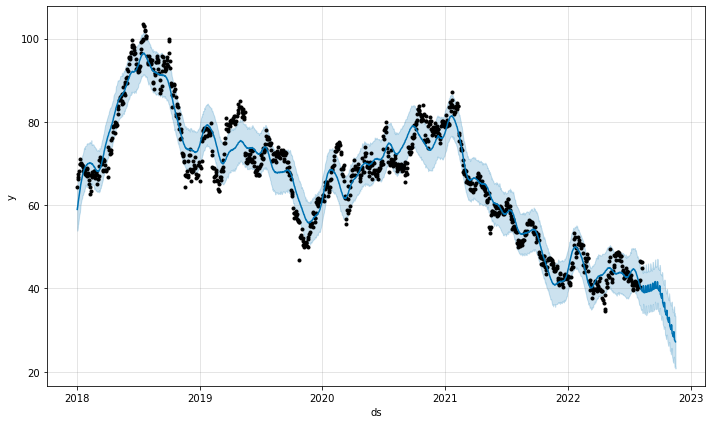

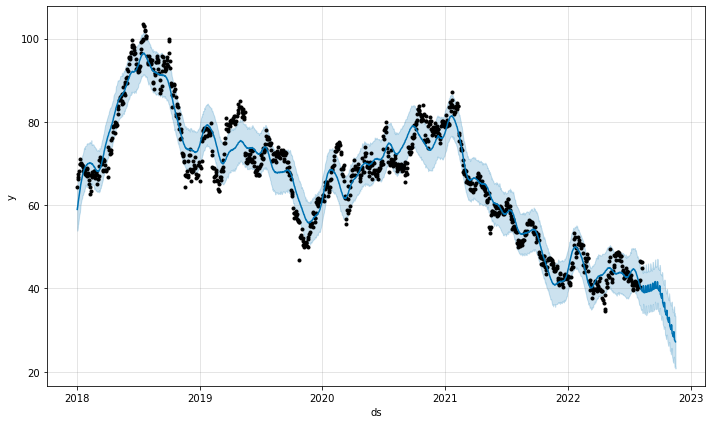

In [22]:
model.plot(forecast)

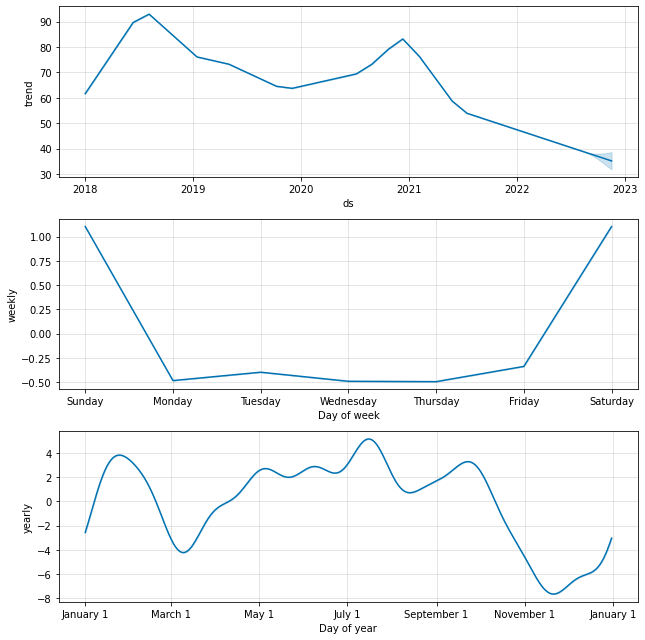

In [23]:
fig2 = model.plot_components(forecast)

In [46]:
model = Prophet()
model.add_country_holidays(country_name='FR')

model.add_regressor('SMA_15')
model.add_regressor('Stochastic_15')
model.add_regressor('Stochastic_Ratio')
# model.add_regressor('price_pct_variation')
# model.add_regressor('volume')
model.add_regressor('title_vader_compound')

p_df = df[['date', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio', 'title_vader_compound', 'close']]
p_df.columns = ['ds', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio',  'title_vader_compound', 'y']

# model.fit(p_df)


16:15:47 - cmdstanpy - INFO - Chain [1] start processing
16:15:47 - cmdstanpy - INFO - Chain [1] done processing


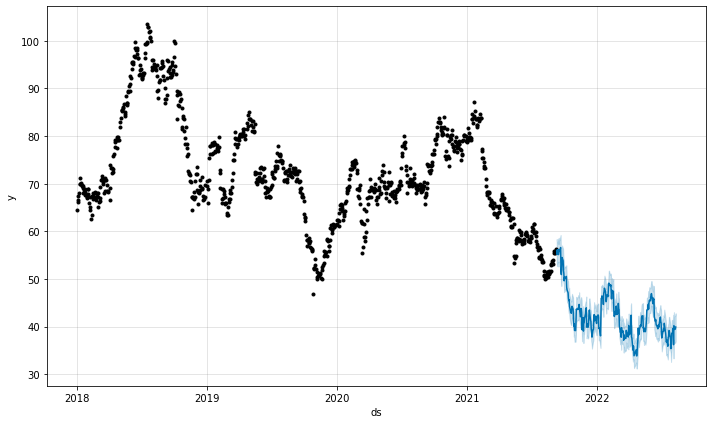

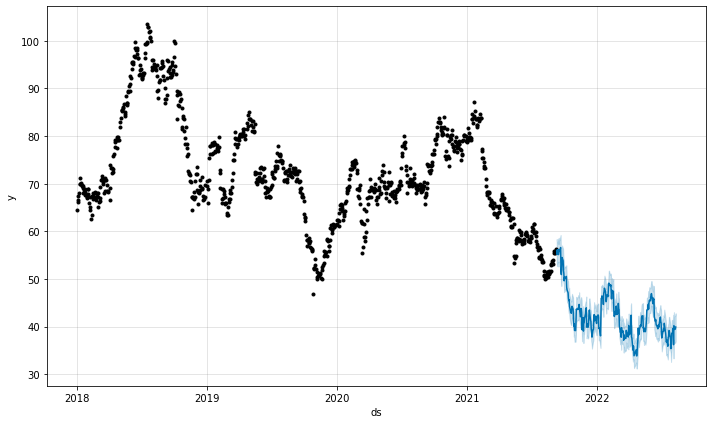

In [47]:
train_size = int(0.8 * len(df))
p_df = p_df.rename(columns = {"date": "ds"})

X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

model.fit(X_train)
forecast = model.predict(X_test)
model.plot(forecast)



In [48]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1039,2021-12-13
1040,2021-12-14
1041,2021-12-15
1042,2021-12-16


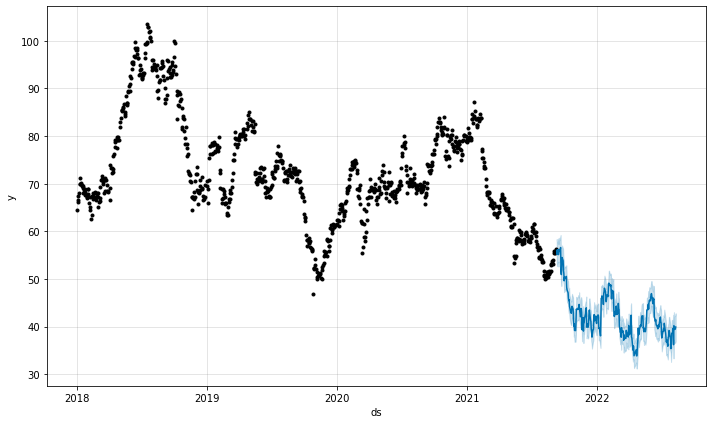

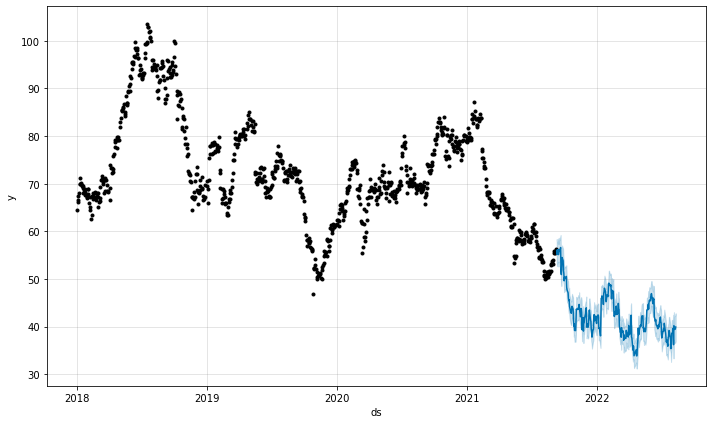

In [49]:
model.plot(forecast)

In [50]:
future = model.make_future_dataframe(periods=1)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
940,2021-09-03
941,2021-09-06
942,2021-09-07
943,2021-09-08


In [51]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()

In [52]:
p_df.head()

,ds,SMA_15,Stochastic_15,Stochastic_Ratio,title_vader_compound,y
0,2018-01-02,64.573334,43.370749,1.145254,0.52645,64.400002
1,2018-01-03,64.484667,49.213487,1.075724,0.20095,66.199997
2,2018-01-04,64.465334,94.326116,1.055682,-0.61240,66.680000
3,2018-01-05,64.615334,81.718468,0.969574,0.22870,67.379997
4,2018-01-08,64.908667,94.515485,0.931893,0.49390,68.120003


In [ ]:
# df_merge = pd.merge(p_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
# df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
# df_merge.head()


In [53]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')


  0%|          | 0/2 [00:00<?, ?it/s]

16:16:21 - cmdstanpy - INFO - Chain [1] start processing
16:16:21 - cmdstanpy - INFO - Chain [1] done processing
16:16:25 - cmdstanpy - INFO - Chain [1] start processing
16:16:25 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-13,62.625871,60.171906,65.241919,56.759998,2020-03-12
1,2020-03-16,61.841242,59.268232,64.204857,58.779999,2020-03-12
2,2020-03-17,63.602551,61.010205,66.146679,64.720001,2020-03-12
3,2020-03-18,66.065286,63.703393,68.464866,61.480000,2020-03-12
4,2020-03-19,64.647909,62.124522,67.345993,58.020000,2020-03-12


In [55]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,7.801029,2.793032,2.225463,0.031717,0.021206,0.031727,0.607843
1,38 days,7.898819,2.810484,2.244656,0.031580,0.021206,0.031671,0.598039
2,39 days,7.573530,2.752005,2.199297,0.030746,0.021206,0.030877,0.607843
3,40 days,7.625815,2.761488,2.215834,0.031011,0.023768,0.031131,0.607843
4,41 days,7.584430,2.753984,2.180841,0.030235,0.021206,0.030389,0.627451


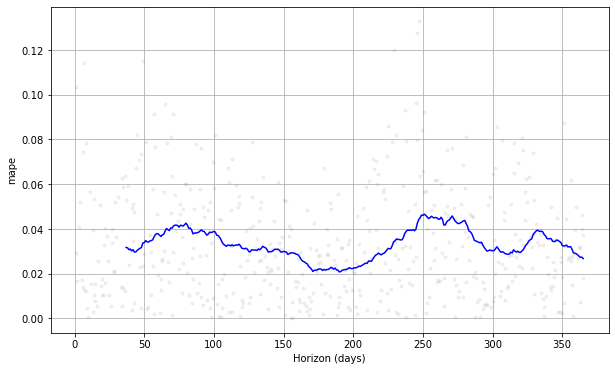

In [56]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [57]:
# Same with Roberta
model = Prophet()
model.add_regressor('close')

In [58]:
model = Prophet()
model.add_country_holidays(country_name='FR')

model.add_regressor('SMA_15')
model.add_regressor('Stochastic_15')
model.add_regressor('Stochastic_Ratio')
# model.add_regressor('price_pct_variation')
# model.add_regressor('volume')
model.add_regressor('title_roberta_neg')
model.add_regressor('title_roberta_neu')
model.add_regressor('title_roberta_pos')

p_df = df[['date', 
           'SMA_15', 
           'Stochastic_15', 
           'Stochastic_Ratio', 
#           'price_pct_variation', 
#           'volume', 
           'title_roberta_neg', 
           'title_roberta_neu', 
           'title_roberta_pos', 
           'close']]
p_df.columns = ['ds', 
                'SMA_15', 
                'Stochastic_15', 
                'Stochastic_Ratio', 
#                'price_pct_variation', 
#                'volume', 
                'title_roberta_neg', 
                'title_roberta_neu', 
                'title_roberta_pos', 
                'y']


16:17:56 - cmdstanpy - INFO - Chain [1] start processing
16:17:56 - cmdstanpy - INFO - Chain [1] done processing


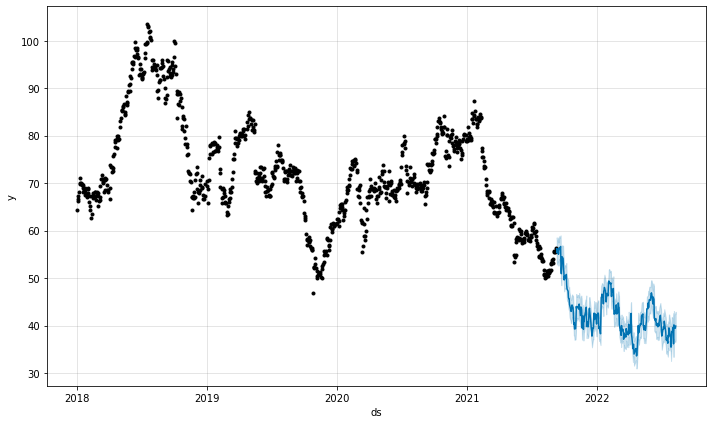

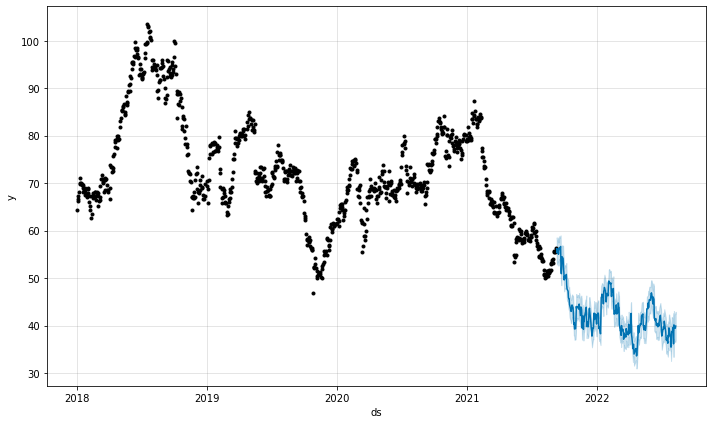

In [59]:
train_size = int(0.8 * len(df))

p_df = p_df.rename(columns = {"date": "ds"})

X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

model.fit(X_train)
forecast = model.predict(X_test)
model.plot(forecast)


In [60]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1039,2021-12-13
1040,2021-12-14
1041,2021-12-15
1042,2021-12-16


In [61]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()


In [62]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/2 [00:00<?, ?it/s]

16:18:28 - cmdstanpy - INFO - Chain [1] start processing
16:18:28 - cmdstanpy - INFO - Chain [1] done processing
16:18:32 - cmdstanpy - INFO - Chain [1] start processing
16:18:32 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Python
from prophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,8.251357,2.872517,2.258555,0.032122,0.025324,0.032124,0.607843
1,38 days,8.358335,2.891079,2.280473,0.032005,0.025324,0.032096,0.598039
2,39 days,8.018883,2.831763,2.238956,0.031216,0.025324,0.031352,0.607843
3,40 days,8.112288,2.848208,2.265892,0.031636,0.027707,0.031757,0.588235
4,41 days,8.037000,2.834960,2.220727,0.030687,0.025324,0.030850,0.607843


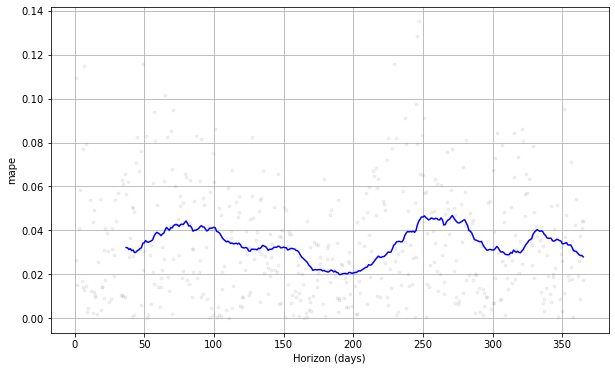

In [65]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [66]:
forecast = model.predict(X_test)

In [68]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice 1918,Armistice 1918_lower,Armistice 1918_upper,Armistice 1945,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
232,2022-08-03,66.086168,33.185673,39.000525,64.630223,67.509019,0.0,0.0,0.0,0.0,...,1.155544,1.155544,1.155544,0.322852,0.322852,0.322852,0.0,0.0,0.0,36.152190
233,2022-08-04,66.076756,37.175021,42.936074,64.611248,67.507263,0.0,0.0,0.0,0.0,...,1.212760,1.212760,1.212760,0.355999,0.355999,0.355999,0.0,0.0,0.0,40.132807
234,2022-08-05,66.067344,36.584772,42.407058,64.592274,67.502777,0.0,0.0,0.0,0.0,...,1.362356,1.362356,1.362356,0.399062,0.399062,0.399062,0.0,0.0,0.0,39.444990
235,2022-08-08,66.039108,36.432416,42.159581,64.543246,67.494398,0.0,0.0,0.0,0.0,...,1.028935,1.028935,1.028935,0.571552,0.571552,0.571552,0.0,0.0,0.0,39.430545
236,2022-08-09,66.029697,37.151995,42.708207,64.530278,67.490246,0.0,0.0,0.0,0.0,...,1.225679,1.225679,1.225679,0.637059,0.637059,0.637059,0.0,0.0,0.0,39.886718


In [69]:
df_1 = pd.DataFrame({"ds": ["2022-08-22", "2022-08-23"], 
                     "trend": ["66.01", "66.02"]})

In [70]:
df_1

,ds,trend
0,2022-08-22,66.01
1,2022-08-23,66.02


In [73]:
forecast = model.predict(df_1)

ValueError: Regressor 'SMA_15' missing from dataframe

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice 1918,Armistice 1918_lower,Armistice 1918_upper,Armistice 1945,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-09,69.173242,53.708184,58.443040,69.173242,69.173242,0.0,0.0,0.0,0.0,...,1.212760,1.212760,1.212760,0.028740,0.028740,0.028740,0.0,0.0,0.0,56.179441
1,2021-09-10,69.163830,52.789701,57.608641,69.163830,69.163830,0.0,0.0,0.0,0.0,...,1.362356,1.362356,1.362356,0.061196,0.061196,0.061196,0.0,0.0,0.0,55.304053
2,2021-09-13,69.135594,53.556059,58.636667,69.135594,69.135594,0.0,0.0,0.0,0.0,...,1.028935,1.028935,1.028935,0.200063,0.200063,0.200063,0.0,0.0,0.0,56.126568
3,2021-09-14,69.126182,52.521154,57.549901,69.126182,69.126182,0.0,0.0,0.0,0.0,...,1.225679,1.225679,1.225679,0.254015,0.254015,0.254015,0.0,0.0,0.0,55.013929
4,2021-09-15,69.116771,53.446055,58.443812,69.116771,69.116771,0.0,0.0,0.0,0.0,...,1.155544,1.155544,1.155544,0.308371,0.308371,0.308371,0.0,0.0,0.0,55.973958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2022-08-03,66.086168,33.287124,39.020297,64.628914,67.406458,0.0,0.0,0.0,0.0,...,1.155544,1.155544,1.155544,0.322852,0.322852,0.322852,0.0,0.0,0.0,36.152190
233,2022-08-04,66.076756,37.279954,42.795077,64.607735,67.404750,0.0,0.0,0.0,0.0,...,1.212760,1.212760,1.212760,0.355999,0.355999,0.355999,0.0,0.0,0.0,40.132807
234,2022-08-05,66.067344,36.511084,42.423680,64.587655,67.402854,0.0,0.0,0.0,0.0,...,1.362356,1.362356,1.362356,0.399062,0.399062,0.399062,0.0,0.0,0.0,39.444990
235,2022-08-08,66.039108,36.400681,42.193143,64.542950,67.395515,0.0,0.0,0.0,0.0,...,1.028935,1.028935,1.028935,0.571552,0.571552,0.571552,0.0,0.0,0.0,39.430545
